## Task 3.1

Loading libraries and data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.load('x_values-1.npy')
y = np.load('y_values-1.npy')

print(x.shape);
print(y.shape);

(10, 1)
(10, 1)


#### Visualizing the data

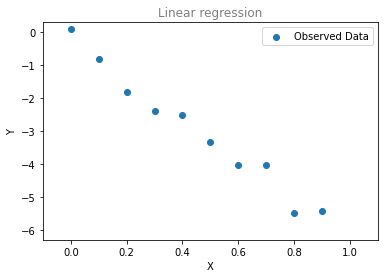

In [ ]:
x_min = np.min(x[:,0]) -0.1
x_max = np.max(x[:,0]) + 0.2
y_min = np.min(y[:,0]) - 0.8
y_max = np.max(y[:,0]) + 0.2

# print(x_min,x_max,y_min,y_max)
fig = plt.scatter(x, y,label = 'Observed Data')

plt.title("Linear regression", alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks() #for the markings on the x axis and y axis respectively.
plt.yticks()

##After below checking the unique values and observing that the iris_labels are in order
# plt.legend(fig, labels = ['Observed Data'], 
#            loc = 'upper right')#, bbox_to_anchor=(1.3, 1))
#            , title = 'Legend'
plt.legend();
plt.show()

#### Linear regression object and fitting the data in the model
Reference:
https://www.kaggle.com/ashteotia/simple-linear-regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [ ]:
test_x_values = np.load('test_x_values-1.npy')

#### Predicting on the test x values

In [ ]:
y_pred = regressor.predict(test_x_values)
# print(regressor.score(test_x_values, y_pred)*100,'% Prediction Accuracy')

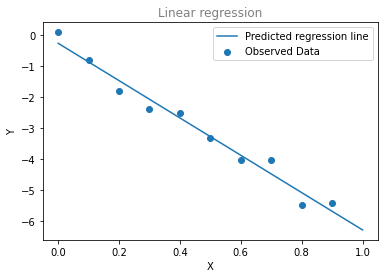

In [ ]:
fig = plt.scatter(x, y,label = 'Observed Data')
plt.plot(test_x_values,y_pred,label = 'Predicted regression line')
plt.title("Linear regression", alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### Print the predicted value of x = 0.48

In [ ]:
# print(regressor.predict([0.48]))

In [ ]:
x_test = np.array(0.48).reshape(-1,1)
print(x_test.shape)
print(regressor.predict(x_test))

(1, 1)
[[-3.14442237]]


## Task 3.2

In [ ]:
winedata = np.load('wineData-1.npy')
winelabels = np.load('wineLabels-1.npy')

In [ ]:
print(winedata.shape,winedata)
print(winelabels.shape,winelabels)

(178, 13) [[1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.182e+01 1.720e+00 1.880e+00 ... 9.400e-01 2.440e+00 4.150e+02]
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]
 ...
 [1.225e+01 1.730e+00 2.120e+00 ... 1.000e+00 3.170e+00 5.100e+02]
 [1.330e+01 1.720e+00 2.140e+00 ... 1.020e+00 2.770e+00 1.285e+03]
 [1.251e+01 1.240e+00 2.250e+00 ... 7.500e-01 1.510e+00 6.500e+02]]
(178,) [2 1 2 2 2 2 1 2 0 2 0 0 0 1 2 2 0 0 2 0 2 2 0 1 1 0 1 2 0 0 2 1 0 0 2 0 0
 2 1 0 0 1 1 0 1 0 0 2 2 1 1 1 2 0 1 2 0 2 2 0 0 1 1 0 1 0 1 1 0 2 1 1 1 1
 0 1 2 0 2 1 1 1 1 2 0 0 1 2 0 1 0 0 0 0 1 1 0 2 2 0 1 0 2 2 0 2 0 1 1 0 0
 1 1 1 0 2 1 0 1 1 1 1 1 1 2 1 1 2 2 1 0 1 1 2 1 1 0 1 2 2 1 0 1 1 2 0 0 2
 0 2 2 1 2 1 0 1 1 2 1 1 0 1 0 1 1 1 2 0 1 2 0 0 1 0 1 1 0 2]


In [ ]:
# Checking unique values for the model
winelabels_value , counts = np.unique(winelabels, return_counts = True)
print(np.asarray((winelabels_value, counts)).T)

[[ 0 59]
 [ 1 71]
 [ 2 48]]


#### Describing the data
- We have a data set of 178 samples with 13 features.
- Labels has unique 0,1 and 2 value so seemingly wines shall be labelled as one of the three based on the features.

**Splitting the data training and test data**<br>Using slicing in the ratio of 80:20 for training:test<br>[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Select data points to divide into a training and testing set
n = winedata.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = winedata[:split_point, :] 
train_labels = winelabels[:split_point] 
test_data = winedata[split_point:, :] 
test_labels = winelabels[split_point:] 

In [ ]:
print(train_data.shape, test_data.shape, train_labels.shape,test_labels.shape)

(142, 13) (36, 13) (142,) (36,)


In [ ]:
# a = [i for i in range(0,178)]
# # print(a)
# print(a[:math.ceil(len(winedata)*0.8)])
# print(a[-(int(len(winedata)*0.2)):])


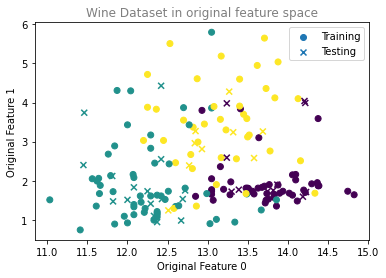

In [ ]:
# x_train_data = train_data[:,:2] # feature 0 and 1 only
# x_test_data = test_data[:,:2]   # feature 0 and 1 only

fig = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, label='Training') #, edgecolor="k"
fig = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, marker = 'x', label='Testing') #, edgecolor="k"
# plt.plot(x_test_data[:, 0], x_test_data[:, 1], c=test_labels, marker='x' )
plt.title("Wine Dataset in original feature space", alpha = 0.5)
plt.xlabel("Original Feature 0")
plt.ylabel("Original Feature 1")
plt.legend()
plt.show()

Initializing PCA object - only 2 PCA components - this will reduce
<br>Reference: 
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [ ]:
print(train_data.shape, test_data.shape, train_labels.shape,test_labels.shape)

(142, 13) (36, 13) (142,) (36,)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
print("Initialized")
pca.fit(train_data)
train_data_tr = pca.transform(train_data) #tr stands for transformed
# train_data = pca.fit_transform(train_data)
print("Fitted and transformed", train_data_tr.shape)

Initialized
Fitted and transformed (142, 2)


- Fit PCA model to the training data
- Applying dimensionality reduction transform to the trainig data

Applying dimensionality reduction transform to testing data

In [ ]:
test_data_tr = pca.transform(test_data)
print("Training data transformed and dimensionality reduced", test_data_tr.shape)

Training data transformed and dimensionality reduced (36, 2)


###### Visualizing PCA components

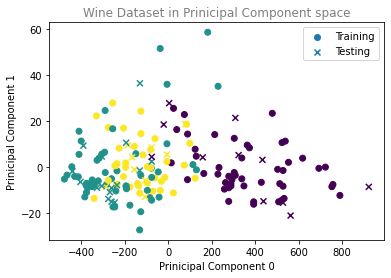

In [ ]:
fig = plt.scatter(train_data_tr[:,0], train_data_tr[:,1], c=train_labels, label='Training') #, edgecolor="k"
fig = plt.scatter(test_data_tr[:,0], test_data_tr[:,1], c=test_labels, marker = 'x', label='Testing') #, edgecolor="k"

plt.title("Wine Dataset in Prinicipal Component space", alpha = 0.5)
plt.xlabel("Prinicipal Component 0")
plt.ylabel("Prinicipal Component 1")
plt.legend()
plt.show()

## Task 3.3 Linear Discriminant Analysis with sklearn

Use Linear Discriminant Analysis(LDA) to reduce the dimensionlaity of the Wine Dataset


References:
- https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://towardsdatascience.com/linear-discriminant-analysis-an-introduction-50230ba7dadb#:~:text=LDA%20transforms%20the%20original%20features,metric%20that%20measures%20the%20separability

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Select data points to divide into a training and testing set
n = winedata.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = winedata[:split_point, :] 
train_labels = winelabels[:split_point] 
test_data = winedata[split_point:, :] 
test_labels = winelabels[split_point:] 
print(train_data.shape, test_data.shape, train_labels.shape,test_labels.shape)

# fitting the LDA model
lda = LDA(n_components=2)

(142, 13) (36, 13) (142,) (36,)


We need to provide the class labels for training data because LDA is a supervised algorithm that maximises separability between classes whereas PCA is an unsupervised algorithm that focusses on maximising variance in a dataset.

In [ ]:
lda_X = lda.fit(train_data,train_labels)
print("Data fit in LDA model")

Data fit in LDA model


- Applying dimensionality reduction to training data
- Applying dimensionality reduction to testing data

In [ ]:
train_data_tr_lda = lda_X.transform(train_data)
test_data_tr_lda = lda_X.transform(test_data)
print("Data transformed/dimensionality reduced",train_data_tr_lda.shape,test_data_tr_lda.shape)

Data transformed/dimensionality reduced (142, 2) (36, 2)


Visualizing Data

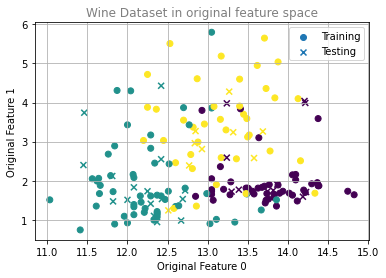

In [ ]:
fig = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, label='Training') #, edgecolor="k"
fig = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, marker = 'x', label='Testing') #, edgecolor="k"
# plt.plot(x_test_data[:, 0], x_test_data[:, 1], c=test_labels, marker='x' )
plt.title("Wine Dataset in original feature space", alpha = 0.5)
plt.xlabel("Original Feature 0")
plt.ylabel("Original Feature 1")
plt.legend()
plt.grid()
plt.show()

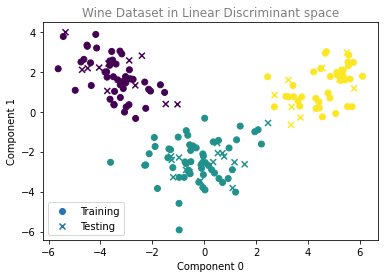

In [ ]:
fig = plt.scatter(train_data_tr_lda[:,0], train_data_tr_lda[:,1], c=train_labels, label='Training') #, edgecolor="k"
fig = plt.scatter(test_data_tr_lda[:,0], test_data_tr_lda[:,1], c=test_labels, marker = 'x', label='Testing') #, edgecolor="k"


plt.title("Wine Dataset in Linear Discriminant space", alpha = 0.5)
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.legend()
plt.show()

## Task 3.4
#### Principal Component Analysis by hand

In [ ]:
# Select data points to divide into a training and testing set
n = winedata.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = winedata[:split_point, :] 
train_labels = winelabels[:split_point] 
test_data = winedata[split_point:, :] 
test_labels = winelabels[split_point:] 
print(train_data.shape, test_data.shape, train_labels.shape,test_labels.shape)

(142, 13) (36, 13) (142,) (36,)


In [ ]:
print(train_data[train_labels==0,:].shape) #this tells that where train_label == 0 only that dataset is picked up from train_data

(48, 13)


In [ ]:
# Define some basic data properties
n_class = np.max(train_labels) + 1
n_samples = train_data.shape[0]
n_features = train_data.shape[1]

print(n_class,n_samples,n_features)

# Calculate class sample counts
n_samples_in_class = np.zeros(n_class)
for i_class in range(n_class):
    n_samples_in_class[i_class] = train_data[train_labels==i_class, :].shape[0]
print(n_samples_in_class)

3 142 13
[48. 55. 39.]


In [ ]:
# Calculate class means
mu = np.mean(train_data, axis=0)
mu_class = np.zeros((n_class, n_features)) # 3X13
for i_class in range(n_class):
    mu_class[i_class, :] = np.mean(train_data[train_labels==i_class, :], axis=0)
    
print(mu_class, mu_class.shape)

[[1.37391667e+01 1.91375000e+00 2.44729167e+00 1.70833333e+01
  1.05937500e+02 2.82291667e+00 2.98666667e+00 2.85625000e-01
  1.93458333e+00 5.56062500e+00 1.07125000e+00 3.15062500e+00
  1.12337500e+03]
 [1.23014545e+01 1.93090909e+00 2.25200000e+00 2.03963636e+01
  9.50545455e+01 2.32472727e+00 2.15563636e+00 3.52545455e-01
  1.63890909e+00 3.15163636e+00 1.07901818e+00 2.81363636e+00
  5.28090909e+02]
 [1.31697436e+01 3.43564103e+00 2.42794872e+00 2.14871795e+01
  9.92051282e+01 1.66102564e+00 8.17179487e-01 4.35128205e-01
  1.18000000e+00 7.47205128e+00 6.68717949e-01 1.64871795e+00
  6.26666667e+02]] (3, 13)


In [ ]:
#mu_centered

**Centered data**

In [ ]:
# mu_centred_data = np.zeros((n_samples, n_features))
# for i_class in range(n_class):
#     mu_centred_data[train_labels==i_class,:] = train_data[train_labels==i_class, :] - mu_class[i_class,:]

mu_centred_data = train_data - np.mean(a=train_data, axis=0)
mu_centred_data_test = test_data - np.mean(a=train_data, axis=0)

In [ ]:
print(mu_centred_data.shape)

(142, 13)


Reference:
- https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/
- https://github.com/christianversloot/machine-learning-articles/blob/main/introducing-pca-with-python-and-scikit-learn-for-machine-learning.md
- 

Applying SVD
<br>X = USV'
<br>X => Mean-centred data, U=> left-singular vectors, S=>singular values and V=right-singular values

(142, 13)
(13, 2)
(142, 2)


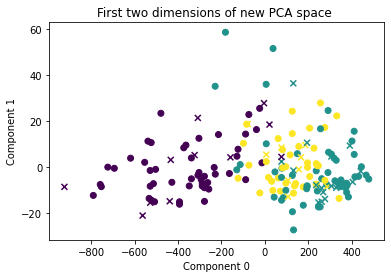

In [ ]:
u, s, vh = np.linalg.svd(mu_centred_data,full_matrices=True)
# print(u,s,vh)

n_dimensions = 2
projection_matrix = vh[0:n_dimensions,:]
# u = u[:, :-2]
# X_a = u.T @ np.diag(s) @ projection_matrix
projected_train_data = mu_centred_data @ projection_matrix.T
projected_test_data = mu_centred_data_test @ projection_matrix.T
print(mu_centred_data.shape)
print(projection_matrix.T.shape)
print(projected_train_data.shape)

plt.figure()
plt.scatter(projected_train_data[:, 0], projected_train_data[:, 1],c=train_labels, marker='o')
plt.scatter(projected_test_data[:, 0], projected_test_data[:, 1], c=test_labels, marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('First two dimensions of new PCA space ')
plt.show(block=False)



In [ ]:
u, s, vh = np.linalg.svd(mu_centred_data,full_matrices=True)
print(u,s,vh)

[[-0.05586873  0.08291861 -0.02735865 ... -0.05996389 -0.08604169
  -0.07622057]
 [-0.04188373  0.11740018 -0.05139908 ... -0.03052205  0.08059531
   0.08423538]
 [-0.04182928  0.11598078 -0.08901873 ... -0.0239108  -0.04275791
  -0.05665441]
 ...
 [-0.0559264   0.08344348  0.10830911 ...  0.91067369  0.02655998
   0.03590691]
 [-0.04127239  0.11560518 -0.04815269 ...  0.00340039  0.84468958
  -0.00401267]
 [-0.10622673 -0.03603328 -0.05770487 ...  0.03895764 -0.02243608
   0.94636661]] [9.30873823e+03 1.04641356e+03 1.55708045e+02 3.52357130e+01
 2.70602073e+01 1.32902950e+01 6.71907125e+00 6.03449840e+00
 4.61347489e+00 3.99610881e+00 3.01650263e+00 2.04116430e+00
 1.21890680e+00] [[ 6.68211221e-02  7.98086861e-02  7.96179266e-02  6.00914045e-02
  -3.82118211e-02  7.95667178e-02  7.97589194e-02  8.20404335e-02
   8.04307616e-02  7.60399631e-02  8.12755418e-02  7.92446254e-02
  -9.66020594e-01]
 [-2.57084397e-01 -2.96367871e-01 -2.99512040e-01 -2.07309051e-01
   7.42304333e-02 -3.0222

In [ ]:
n_dimensions = 2
projection_matrix = vh[n_dimensions,:].real
# u = u[:, :-2]
# X_a = u.T @ np.diag(s) @ projection_matrix
projected_train_data = mu_centred_data*projection_matrix
projected_test_data = mu_centred_data_test*projection_matrix
# print(X_a)

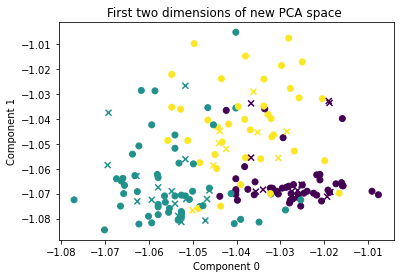

In [ ]:
plt.figure()
plt.scatter(projected_train_data[:, 0], projected_train_data[:, 1], c=train_labels, marker='o')
plt.scatter(projected_test_data[:, 0], projected_test_data[:, 1], c=test_labels, marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('First two dimensions of new PCA space ')
plt.show(block=False)

In [ ]:
print(vh)

[[ 6.68211221e-02  7.98086861e-02  7.96179266e-02  6.00914045e-02
  -3.82118211e-02  7.95667178e-02  7.97589194e-02  8.20404335e-02
   8.04307616e-02  7.60399631e-02  8.12755418e-02  7.92446254e-02
  -9.66020594e-01]
 [-2.57084397e-01 -2.96367871e-01 -2.99512040e-01 -2.07309051e-01
   7.42304333e-02 -3.02222606e-01 -3.05249172e-01 -3.07413371e-01
  -3.04442205e-01 -2.93486694e-01 -3.05623994e-01 -3.00302796e-01
  -2.57785191e-01]
 [ 1.82980620e-02  1.56829902e-02  2.65228815e-02  4.43643439e-02
   9.95963753e-01  2.20907790e-02  2.28651222e-02  2.25713410e-02
   2.74818831e-02  3.75816565e-02  2.27568878e-02  1.68498294e-02
  -1.77217300e-02]
 [-6.46713157e-02  3.49929625e-02 -2.84879120e-02  9.27486184e-01
  -2.93170990e-02 -1.24440011e-01 -1.81459098e-01 -6.83856371e-02
  -1.19091320e-01  1.69425857e-01 -1.07554081e-01 -1.58489003e-01
   5.25491029e-03]
 [ 1.08078389e-01  1.40458674e-01 -4.59828682e-02 -2.84972992e-01
  -5.06853205e-03 -1.31551006e-01 -2.28699902e-01 -2.94412862e-02



## Task 3.5 

# Refernce:

https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/

In [ ]:
data = np.load('task3_5_data.npy')
data_lab = np.load('task3_5_labels.npy')
print(data.shape)
# just printed the values for shape part of the new imported data

(60000, 784)


60 thousand samples with 784 features
Reference

https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6#:~:text=The%20explained%20variance%20ratio%20is,or%2080%25%20to%20avoid%20overfitting.

(60000, 87)


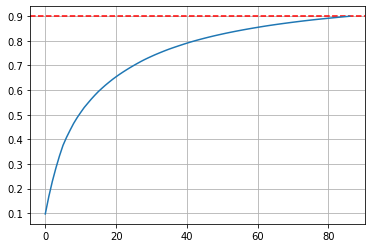

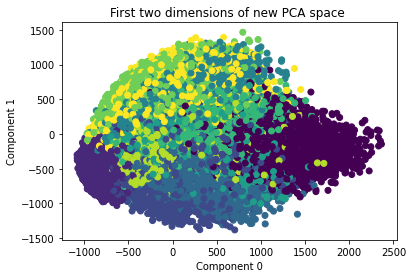

In [142]:
# So fist dierectly apply the pca inbuilt one - as it's not given
pca = PCA(0.9)
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
#fit the data
pca.fit(data)
k = pca.transform(data)
# transform the data into a new data set
print(k.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

plt.figure()
plt.scatter(k[:, 0], k[:, 1],c = data_lab, marker='o')
#plt.scatter(projected_test_data[:, 0], projected_test_data[:, 1], c=test_labels, marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('First two dimensions of new PCA space ')
plt.show(block=False)

so approximately first 225 features contribute to 90 peprcent of variance.

In [ ]:
# task3_5 = np.load('task3_5_data.npy')
# task3_5labels = np.load('task3_5_labels.npy')


In [ ]:
# task3_5_data.shape,task3_5_labels.shape
# len(task3_5_data)
# task3_5_data.shape.count('')



In [ ]:
# task3_5 = np.load('task3_5_data.npy')
# task3_5labels = np.load('task3_5_labels.npy')
# print(task3_5.shape,task3_5)
# print(task3_5labels.shape,task3_5)